In [157]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [158]:
from sklearn.datasets import load_boston

In [159]:
boston=load_boston()

In [160]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [161]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [162]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [163]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [164]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [165]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [166]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)

In [167]:
bos.shape

(506, 13)

In [168]:
bos['target']=boston.target

In [169]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [170]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [171]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

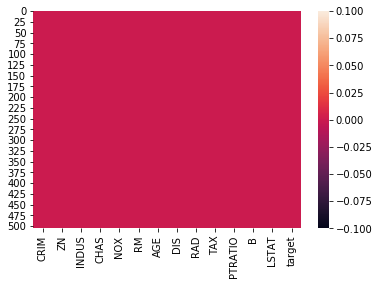

In [172]:
sns.heatmap(bos.isnull())

summary statistics

In [173]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


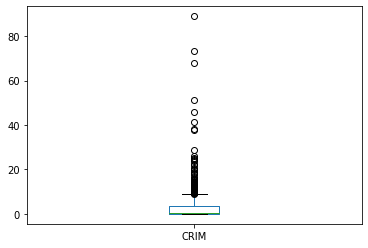

In [174]:
bos['CRIM'].plot.box()

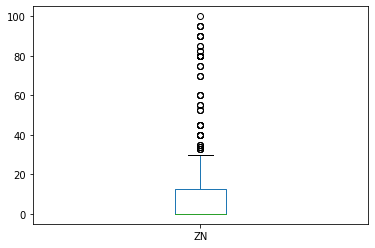

In [175]:
bos['ZN'].plot.box()

In [176]:
#bos.plot?

CRIM          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
ZN         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
INDUS      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CHAS       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
NOX        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
RM         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
AGE        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
DIS              AxesSubplot(0.125,0.125;0.0945122x0.343182)
RAD           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
TAX           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PTRATIO       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
B             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
LSTAT         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target        AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

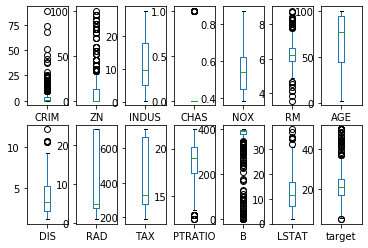

In [177]:
bos.plot(kind='box',subplots=True,layout=(2,7))

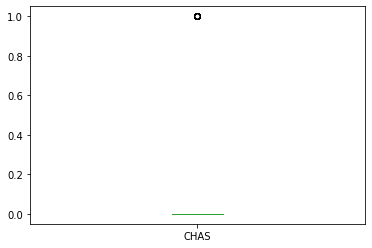

In [178]:
bos['CHAS'].plot.box()

In [179]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(bos))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [180]:
threshold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [181]:
z[55][1]

3.375038763517294

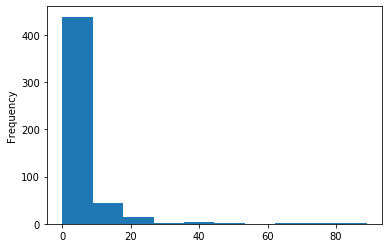

In [182]:
bos['CRIM'].plot.hist()

In [183]:
#bos['CRIM']=np.log(bos['CRIM'])
#bos['CRIM'].plot.hist()

In [184]:
from scipy.stats import boxcox
# 0  -> log transform
# .5  -> square root transform
bos['CRIM']=boxcox(bos['CRIM'],0)

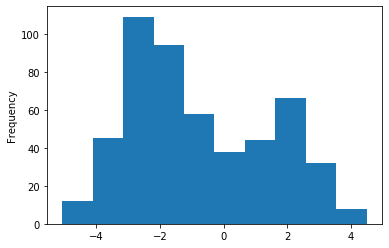

In [185]:
bos['CRIM'].plot.hist()

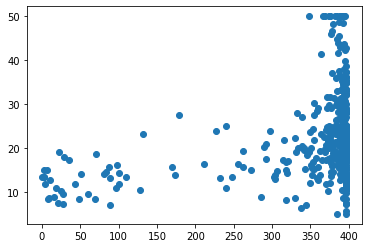

In [186]:
plt.scatter(bos['B'],bos['target'])
plt.show()

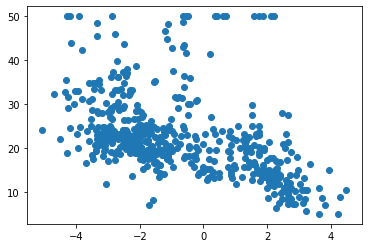

In [187]:
plt.scatter(bos['CRIM'],bos['target'])

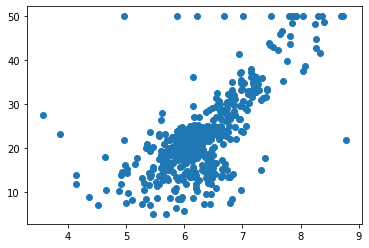

In [188]:
x=bos['RM']
y=bos['target']
plt.scatter(x,y)
plt.show()

In [189]:
#sns.pairplot(bos)

In [190]:
#plt.figure?

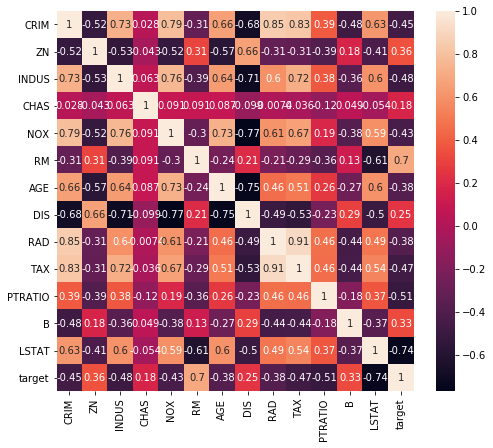

In [191]:
corr_hmap=bos.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

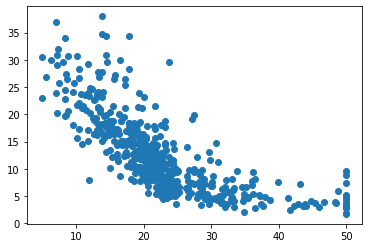

In [192]:
plt.scatter(bos['target'],bos["LSTAT"])
plt.show()

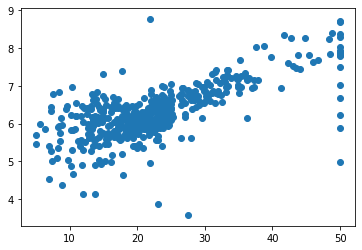

In [193]:
plt.scatter(bos['target'],bos['RM'])
plt.show()

In [194]:
#drop the Lstat
bos.drop('LSTAT',axis=1,inplace=True)

In [195]:
#lstat dropped
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2


In [196]:
bos_new=bos[(z<3).all(axis=1)]  #removing outliers

In [197]:
bos.shape

(506, 13)

In [198]:
bos_new.shape

(415, 13)

In [199]:
bos=bos_new
bos.shape

(415, 13)

In [200]:
x=bos.iloc[:,0:-1]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [201]:
y=bos.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [202]:
x.shape

(415, 12)

In [203]:
y.shape

(415,)

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [205]:
x_train.shape

(278, 12)

In [206]:
y_train.shape

(278,)

In [207]:
x_test.shape

(137, 12)

In [208]:
y_test.shape

(137,)

## Practice Machine Learning

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
bos.columns

In [ ]:
lm.score(x_train,y_train)

In [ ]:
#predict the value
pred=lm.predict(x_test)
print('Predicted result price:',pred)
print('actual price',y_test)

In [ ]:
print('error')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))

print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
#r2 score  _> coefficient of determination
#is the proportion of thevariance in the dependent variable that is predictable from the independent variable(s)
# i.e. change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

In [ ]:
#predict the house price by providing the values
t=np.array([0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90])

In [ ]:
t.shape

In [ ]:
t=t.reshape(1,-1)
t.shape

In [ ]:
lm.predict(t)

In [ ]:
td=np.array([0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90])


In [ ]:
td.shape

In [ ]:
td=td.reshape(1,-1)
td.shape

In [ ]:
lm.predict(td)

In [ ]:
df=pd.DataFrame(pred)
df.to_csv('house_pred_submission.csv')

In [ ]:
# class 7-6-2020 cross validation

from sklearn.model_selection import cross_val_score

lmscore=cross_val_score(lm,x,y,cv=8)
lmscore
print(lmscore.mean)

## Class 7-june- 2020

### Regularization:: L1 and L2 Regularization
L1--------lasso Regression

L2--------Ridge Regression

L1+L2-----ElasticNet Regression

In [ ]:
from sklearn.linear_model import Lasso,Ridge

In [ ]:
# x_train,x_test,y_train,y_test

In [ ]:
# will reduce the cofficient to zerp (those feature are not informative)

# Dfault Value of aplpha=1.0
# alpha  =.01
ls=Lasso(alpha=0.01)
#Ls=Lasso(alpha=1.0)  #Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

In [ ]:
ls.coef_

In [ ]:
plt.bar(boston.feature_names,ls.coef_)
plt.show()

## Practice macine learning

In [ ]:
#Basic libreary
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visulaizatiom
import seaborn as sns
import matplotlib.pyplot as plt

#Check skewness and outliers
from scipy.stats import zscore, boxcox

#Data Pre-processing
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

#Data Validation
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#ML Algorithm
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor

#model Save 
import joblib
from joblib import dump

In [ ]:
LR=LinearRegression()
ElasticNet=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
ETR=ExtraTreesRegressor()
BR=BaggingRegressor()

In [ ]:
models=[]
models.append(('LinearRegreesion',LR))
models.append(('ElasticNet',ElasticNet))
models.append(('Kneighbors',KNR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegreesor',RFR))
models.append(('AdaBoostRegreesor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('BaggingRegreesor',BR))

In [ ]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('********',name,'********')
    print('\n')
    Model.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score*100)
    print('\n')
    pred=model.predict(x_test)
    print('\n')
    
    #R2_Score
    r_score=r2_score(y_test,pred)
    print('R2_Score:',r_score)
    R2_Score.append(r_score*100)
    print('\n')
    
    #cross val score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse)
    print('\n\n')

In [ ]:
result=pd.DataFrame({'model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_Val_Score':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

In [ ]:
#Basic Libreary
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Check skewness and Outliers
from scipy.stats import zscore,boxcox

#datapre-processing Libreary
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

#DAta validation
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#ML Algorithm
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor

In [ ]:
LR=LinearRegression()
Ridge=Ridge()
Lasso=Lasso()
ElasticNet=ElasticNet()
KNR=KNeighborsRegressor()
SVR=SVR()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
ETR=ExtraTreesRegressor()
BR=BaggingRegressor()

In [ ]:
models=[]
models.append(('Linear Regreesion',LR))
models.append(('Ridge',Ridge))
models.append(('Lasso',Lasso))
models.append(('ElasticNet',ElasticNet))
models.append(('KNeighbors Regressor',KNR))
models.append(('SVR',SVR))
models.append(('Decision Tree Regressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('BaggingRegressor',BR))

In [ ]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('********',name,'********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    
    #SCore
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score*100)
    print('\n')
    pred=model.predict(x_test)
    print('\n')
    
    #R2Score
    r_score=r2_score(y_test,pred)
    print('R2_Score:',r_score)
    R2_Score.append(r_score*100)
    print('\n')
    
    #Cross val Score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae*100)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse*100)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse*100)
    print('\n\n')

In [ ]:
result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross Val':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

In [ ]:
LR=LinearRegression()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
ETR=ExtraTreesRegressor()
BR=BaggingRegressor()

In [ ]:
models=[]
models.append(('Linear Regression',LR))
models.append(('KNeighbors Regressor',KNR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegreesor',RFR))
models.append(('AdaBoostRegreesor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('BAggingRegressor',BR))

In [ ]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('********',name,'********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score*100)
    print('\n')
    pred=model.predict(x_test)
    
    #R2_SCore
    r_score=r2_score(y_test,pred)
    print('R2_Score',r_score)
    R2_Score.append(r_score*100)
    print('\n')
    
    #Cross Val
    cross_val=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae*100)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse*100)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse*100)
    print('\n\n')

In [ ]:
result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_Val_Score':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

In [209]:
#Basic Libreary
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data visulization Libreary
import seaborn as sns
import matplotlib.pyplot as plt

#Check Skewness and Outliers
from scipy.stats import zscore,boxcox

#Data Pre-processing Libreary
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

#Model Validation
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#ML Alogorithm
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor

#model Saving
import joblib
from joblib import dump

In [210]:
LR=LinearRegression()
Ridge=Ridge()
Lasso=Lasso()
ElasticNet=ElasticNet()
KNR=KNeighborsRegressor()
SVR=SVR()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
ETR=ExtraTreesRegressor()
BR=BaggingRegressor()

In [211]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Ridge',Ridge))
models.append(('Lasso',Lasso))
models.append(('ElasticNet',ElasticNet))
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SVR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegreesor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))
models.append(('BaggingRegressor',BR))

In [155]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('******',name,'******')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score=',score)
    Score.append(score*100)
    print('\n')
    pred=model.predict(x_test)
    print('\n')
    
    #R2_Score
    r_score=r2_score(y_test,pred)
    print('R2_Score=',r_score)
    R2_Score.append(r_score*100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_Val_Score=',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE=',mae)
    MAE.append(mae*100)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE=',mse)
    MSE.append(mse*100)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE=',rmse)
    RMSE.append(rmse*100)
    print('\n\n')

****** LinearRegression ******


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score= 0.7450145138939895




R2_Score= 0.5559219963471589


Cross_Val_Score= 0.2900558173421981


MAE= 2.828070501926143


MSE= 25.677469856868516


RMSE= 5.067294135617995



****** Ridge ******


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Score= 0.7430387761517521




R2_Score= 0.551998359981706


Cross_Val_Score= 0.32726258683727266


MAE= 2.8203126477000553


MSE= 25.90434228395227


RMSE= 5.089630859301318



****** Lasso ******


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Score= 0.6887168585811737




R2_Score= 0.558419493212573


Cross_Val_Score= 0.23715747584027716


MAE= 3.004705933931553


MSE= 25.533059640753805


RMSE= 5.0

In [156]:
resul=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_Val_Score':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

,Model,Score,R2_Score,Cross_Val_Score,MAE,MSE,RMSE
0,Linear Regression,74.501451,55.592200,29.005582,282.807050,2567.746986,506.729414
1,KNeighbors Regressor,56.970308,32.637160,-85.797353,426.948905,3895.052847,624.103585
2,DecisionTreeRegressor,100.000000,46.053400,22.543558,328.759124,3119.299270,558.506873
3,RandomForestRegressor,96.688604,69.421591,58.172984,236.691971,1768.104210,420.488313
4,GradientBoostingRegreesor,97.144856,66.399448,58.127865,244.523358,1942.850504,440.777779
5,AdaBoostRegreesor,88.650038,63.106698,44.405575,279.696229,2133.243782,461.870521
6,ExtraTreesRegressor,100.000000,78.960130,37.294307,217.053285,1216.566955,348.793199
7,BAggingRegressor,93.772379,60.700349,52.727042,267.591241,2272.383650,476.695254


In [224]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('********',name,'********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score=',score)
    Score.append(score*100)
    print('\n')
    pred=model.predict(x_test)
    print('\n')
    
    #R2_Score
    r_score=r2_score(y_test,pred)
    print('R2_Score=',r_score)
    R2_Score.append(r_score*100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_Val_Score=',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE=',mae)
    MAE.append(mae*100)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE=',mse)
    MSE.append(mse*100)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('MSE=',rmse)
    RMSE.append(rmse*100)
    print('\n\n')

******** LinearRegression ********


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score= 0.7450145138939895




R2_Score= 0.5559219963471589


Cross_Val_Score= 0.2900558173421981


MAE= 2.828070501926143


MSE= 25.677469856868516


MSE= 5.067294135617995



******** Ridge ********


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Score= 0.7430387761517521




R2_Score= 0.551998359981706


Cross_Val_Score= 0.32726258683727266


MAE= 2.8203126477000553


MSE= 25.90434228395227


MSE= 5.089630859301318



******** Lasso ********


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Score= 0.6887168585811737




R2_Score= 0.558419493212573


Cross_Val_Score= 0.23715747584027716


MAE= 3.004705933931553


MSE= 25.533059640753805



In [225]:
result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_Val_Score':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

,Model,Score,R2_Score,Cross_Val_Score,MAE,MSE,RMSE
0,LinearRegression,74.501451,55.592200,29.005582,282.807050,2567.746986,506.729414
1,Ridge,74.303878,55.199836,32.726259,282.031265,2590.434228,508.963086
2,Lasso,68.871686,55.841949,23.715748,300.470593,2553.305964,505.302480
3,ElasticNet,58.777523,49.612483,16.385771,350.766280,2913.506040,539.769028
4,KNeighborsRegressor,56.970308,32.637160,-85.797353,426.948905,3895.052847,624.103585
5,SVR,17.448953,18.924742,-18.426127,461.512859,4687.932015,684.684746
6,DecisionTreeRegressor,100.000000,47.195592,23.066390,324.817518,3053.255474,552.562709
7,RandomForestRegressor,97.036177,67.717979,58.447544,234.655474,1866.610413,432.042870
8,GradientBoostingRegreesor,98.110989,63.296846,51.782617,243.743870,2122.249061,460.678745
9,AdaBoostRegressor,89.894696,64.386892,47.297137,267.578538,2059.220425,453.786340
